## AnthroScore Analysis Across Topics
We conduct an analysis of how the level of anthromorphism differ across various journals through measuring the Anthroscores in documents in each of these topics and how the AnthroScore for these documents change over time. 

In [1]:
# analysis of anthroscores
from anthroscore_utils import get_anthroscore

In [2]:
import torch
from transformers import RobertaForMaskedLM, RobertaTokenizer, DistilBertForMaskedLM

In [3]:
import transformers

We use the same term $X_{LM}$ and $X_{artifact}$ as in the paper: 

Thus, $X_{LM} = \{\}$ and $X_{artifact} = \{\}$

In [4]:
with open("LM_terms.txt") as f:
        LLM_entities = [line.rstrip('\n') for line in f]
    
model = DistilBertForMaskedLM.from_pretrained('roberta-base')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("BERT model loaded on %s"%device)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of DistilBertForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['transformer.layer.3.output_layer_norm.weight', 'transformer.layer.8.ffn.lin1.bias', 'transformer.layer.9.attention.out_lin.bias', 'vocab_transform.bias', 'transformer.layer.0.attention.k_lin.bias', 'transformer.layer.6.ffn.lin2.bias', 'transformer.layer.3.attention.k_lin.weight', 'transformer.layer.0.attention.out_lin.weight', 'transformer.layer.5.ffn.lin1.bias', 'transformer.layer.2.output_layer_norm.bias', 'transformer.layer.3.ffn.lin1.bias', 'transformer.layer.6.sa_layer_norm.bias', 'transformer.layer.1.ffn.lin1.weight', 'transformer.layer.4.attention.q_lin.bias', 'transformer.layer.0.attention.out_lin.bias', 'transformer.layer.5.output_layer_norm.bias', 'transformer.layer.8.attention.q_lin.bias', 't

BERT model loaded on cuda


In [5]:
import pandas as pd

In [6]:
# get anthroscore of document
acl_articles = pd.read_parquet("acl-publication-info.74k.v2.parquet")

In [7]:
acl_articles_preprocessed = acl_articles.loc[acl_articles['full_text'].notnull() & acl_articles['abstract'].notnull()]

In [8]:
acl_articles_preprocessed

,acl_id,abstract,full_text,corpus_paper_id,pdf_hash,numcitedby,url,publisher,address,year,...,doi,number,volume,journal,editor,isbn,ENTRYTYPE,ID,language,note
0,O02-2002,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...,18022704,0b09178ac8d17a92f16140365363d8df88c757d0,14,https://aclanthology.org/O02-2002,None,None,2002,...,None,None,None,None,None,None,inproceedings,chen-you-2002-study,None,None
2,R13-1042,Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...,16703040,3eb736b17a5acb583b9a9bd99837427753632cdb,10,https://aclanthology.org/R13-1042,"INCOMA Ltd. Shoumen, BULGARIA","Hissar, Bulgaria",2013,...,None,None,None,None,None,None,inproceedings,jamison-gurevych-2013-headerless,None,None
3,W05-0819,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al...",1215281,b20450f67116e59d1348fc472cfc09f96e348f55,15,https://aclanthology.org/W05-0819,Association for Computational Linguistics,"Ann Arbor, Michigan",2005,...,None,None,None,None,None,None,inproceedings,aswani-gaizauskas-2005-aligning,None,None
5,R13-1044,The paper 1 presents a rule-based approach to ...,The paper 1 presents a rule-based approach to ...,2491460,c0f1047fe0f95c367184d494e78bb07b11ee3608,2,https://aclanthology.org/R13-1044,"INCOMA Ltd. Shoumen, BULGARIA","Hissar, Bulgaria",2013,...,None,None,None,None,None,None,inproceedings,kedzia-maziarz-2013-recognizing,None,None
6,W05-0818,"In this paper we describe LIHLA, a lexical ali...","In this paper we describe LIHLA, a lexical ali...",15322146,ff3f05120d24e5dac2879f25402993bc6355f780,5,https://aclanthology.org/W05-0818,Association for Computational Linguistics,"Ann Arbor, Michigan",2005,...,None,None,None,None,None,None,inproceedings,caseli-etal-2005-lihla,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73280,P99-1002,This paper describes recent progress and the a...,This paper describes recent progress and the a...,715160,ab17a01f142124744c6ae425f8a23011366ec3ee,11,https://aclanthology.org/P99-1002,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034680,None,None,None,None,None,inproceedings,furui-1999-automatic,None,None
73281,P00-1009,We present an LFG-DOP parser which uses fragme...,We present an LFG-DOP parser which uses fragme...,1356246,ad005b3fd0c867667118482227e31d9378229751,12,https://aclanthology.org/P00-1009,Association for Computational Linguistics,Hong Kong,2000,...,10.3115/1075218.1075227,None,None,None,None,None,inproceedings,bod-2000-improved,None,None
73282,P99-1056,The processes through which readers evoke ment...,The processes through which readers evoke ment...,7277828,924cf7a4836ebfc20ee094c30e61b949be049fb6,14,https://aclanthology.org/P99-1056,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034745,None,None,None,None,None,inproceedings,lange-content-1999-grapho,None,None
73283,P99-1051,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...,1829043,6b1f6f28ee36de69e8afac39461ee1158cd4d49a,92,https://aclanthology.org/P99-1051,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034740,None,None,None,None,None,inproceedings,lapata-1999-acquiring,None,None


In [9]:
acl_articles_preprocessed['abstract']

0        There is a need to measure word similarity whe...
2        Thread disentanglement is the task of separati...
3        In this paper, we describe a word alignment al...
5        The paper 1 presents a rule-based approach to ...
6        In this paper we describe LIHLA, a lexical ali...
                               ...                        
73280    This paper describes recent progress and the a...
73281    We present an LFG-DOP parser which uses fragme...
73282    The processes through which readers evoke ment...
73283    This paper examines the extent to which verb d...
73284    Spoken dialogue managers have benefited from u...
Name: abstract, Length: 63903, dtype: object

In [10]:
LLM_entities

['palm',
 'lms',
 'llama',
 'transformers',
 'language models',
 'language model',
 'gpt',
 'plms',
 'pretrained language models',
 'gpt-2',
 'xlnet',
 'large language models',
 'llms',
 'gpt-3',
 'foundation model',
 'gpt-neo',
 'gpt-j',
 'chatgpt',
 'gpt-4',
 'system',
 'model',
 'algorithm',
 'approach',
 'network',
 'software',
 'architecture',
 'framework']

In [11]:
american_journal_comp_ling = acl_articles_preprocessed.loc[acl_articles_preprocessed['journal'] == 'American Journal of Computational Linguistics']
num_papers_american_journal_comp_ling = american_journal_comp_ling.shape[0]
mean_citation = round(american_journal_comp_ling['numcitedby'].mean(),2)
print(f"For the American Journal of Computational Linguistics, there are {num_papers_american_journal_comp_ling} papers with average {mean_citation} citations")


For the American Journal of Computational Linguistics, there are 230 papers with average 26.97 citations


In [12]:
#english_papers = acl_articles_preprocessed.loc[acl_articles['language'] == 'English']

#english_papers.shape
american_journal_comp_ling['anthroscore'] = american_journal_comp_ling.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


C:\Users\peiyu\AppData\Local\Temp\ipykernel_11196\769254904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_journal_comp_ling['anthroscore'] = american_journal_comp_ling.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


In [13]:
american_journal_comp_ling.sort_values(by="year",inplace=True)

C:\Users\peiyu\AppData\Local\Temp\ipykernel_26812\3352088079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_journal_comp_ling.sort_values(by="year",inplace=True)


<Axes: xlabel='year', ylabel='anthroscore'>

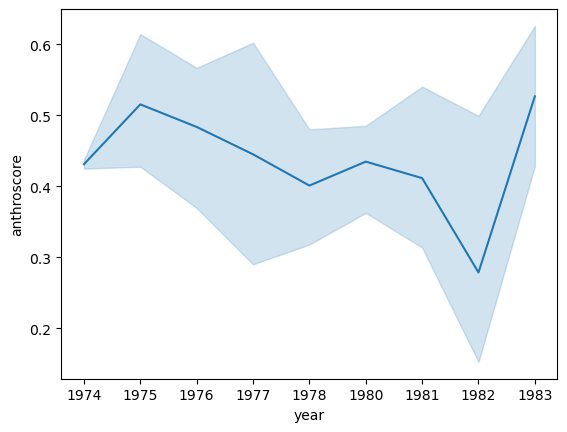

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x="year",y="anthroscore",data=american_journal_comp_ling)

In [15]:
comp_ling = acl_articles_preprocessed.loc[acl_articles_preprocessed['journal'] == 'Computational Linguistics']
comp_ling.sort_values(by="year",inplace=True)
comp_ling['anthroscore'] = comp_ling.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


C:\Users\peiyu\AppData\Local\Temp\ipykernel_26812\2679162635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_ling.sort_values(by="year",inplace=True)
C:\Users\peiyu\AppData\Local\Temp\ipykernel_26812\2679162635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_ling['anthroscore'] = comp_ling.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, ''),
  Text(0.0, 0, '1984'),
  Text(5.0, 0, '1989'),
  Text(10.0, 0, '1994'),
  Text(15.0, 0, '1999'),
  Text(20.0, 0, '2004'),
  Text(25.0, 0, '2009'),
  Text(30.0, 0, '2014'),
  Text(35.0, 0, '2019'),
  Text(40.0, 0, '')])

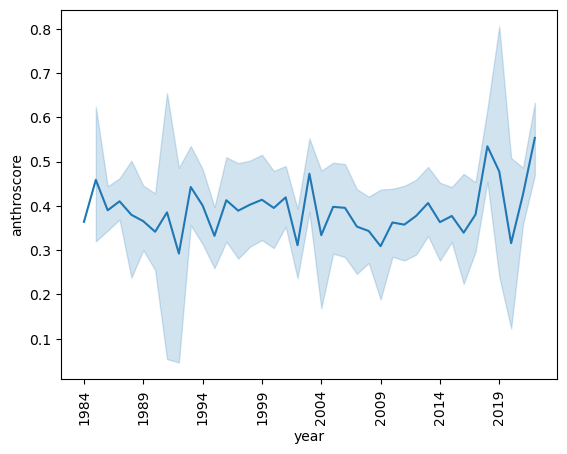

In [16]:
from matplotlib import ticker
ax = sns.lineplot(x="year",y="anthroscore",data=comp_ling)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.xticks(rotation="vertical")

In [17]:
tacl_journal = acl_articles_preprocessed.loc[acl_articles_preprocessed['journal'] == 'Transactions of the Association for Computational Linguistics']


In [18]:
tacl_journal.sort_values(by="year",inplace=True)

C:\Users\peiyu\AppData\Local\Temp\ipykernel_26812\498448431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tacl_journal.sort_values(by="year",inplace=True)


In [19]:
tacl_journal['anthroscore'] = tacl_journal.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


C:\Users\peiyu\AppData\Local\Temp\ipykernel_26812\1410070108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tacl_journal['anthroscore'] = tacl_journal.abstract.apply(lambda a: get_anthroscore(a, entities=LLM_entities, model=model, tokenizer=tokenizer, device=device))


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020'),
  Text(8, 0, '2021'),
  Text(9, 0, '2022')])

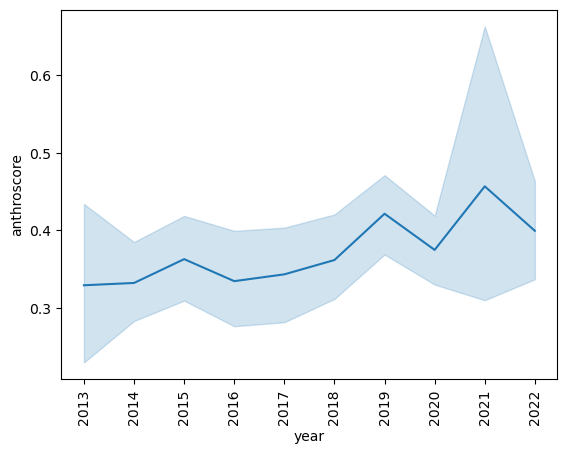

In [20]:
ax = sns.lineplot(x="year",y="anthroscore",data=tacl_journal)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.xticks(rotation="vertical")